In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Question (1a)

In [2]:
df = pd.read_csv('./wdbc.data', header=None)
df.columns = ['ID', 'Diagnosis', 'Radius', 'Texture', 'Perimeter', 'Area', 'Smoothness', 'Compactness', 'Concavity', 'Concave', 'Symmetry', 'Fractal', 'SE_Radius', 'SE_Texture', 'SE_Perimeter', 'SE_Area', 'SE_Smoothness', 'SE_Compactness', 'SE_Concavity', 'SE_Concave', 'SE_Symmetry', 'SE_Fractal', 'L_Radius', 'L_Texture', 'L_Perimeter', 'L_Area', 'L_Smoothness', 'L_Compactness', 'L_Concavity', 'L_Concave', 'L_Symmetry', 'L_Fractal']
df.head()

ID Diagnosis  Radius  Texture  Perimeter    Area  Smoothness  \
0    842302         M   17.99    10.38     122.80  1001.0     0.11840   
1    842517         M   20.57    17.77     132.90  1326.0     0.08474   
2  84300903         M   19.69    21.25     130.00  1203.0     0.10960   
3  84348301         M   11.42    20.38      77.58   386.1     0.14250   
4  84358402         M   20.29    14.34     135.10  1297.0     0.10030   

   Compactness  Concavity  Concave  ...  L_Radius  L_Texture  L_Perimeter  \
0      0.27760     0.3001  0.14710  ...     25.38      17.33       184.60   
1      0.07864     0.0869  0.07017  ...     24.99      23.41       158.80   
2      0.15990     0.1974  0.12790  ...     23.57      25.53       152.50   
3      0.28390     0.2414  0.10520  ...     14.91      26.50        98.87   
4      0.13280     0.1980  0.10430  ...     22.54      16.67       152.20   

   L_Area  L_Smoothness  L_Compactness  L_Concavity  L_Concave  L_Symmetry  \
0  2019.0        0.1622         0.6656       0.7119     0.2654      0.4601   
1  1956.0        0.1238         0.1866       0.2416     0.1860      0.2750   
2  1709.0        0.1444         0.4245       0.4504     0.2430      0.3613   
3   567.7        0.2098         0.8663       0.6869     0.2575      0.6638   
4  1575.0        0.1374         0.2050       0.4000     0.1625      0.2364   

   L_Fractal  
0    0.11890  
1    0.08902  
2    0.08758  
3    0.17300  
4    0.07678  

[5 rows x 32 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              569 non-null    int64  
 1   Diagnosis       569 non-null    object 
 2   Radius          569 non-null    float64
 3   Texture         569 non-null    float64
 4   Perimeter       569 non-null    float64
 5   Area            569 non-null    float64
 6   Smoothness      569 non-null    float64
 7   Compactness     569 non-null    float64
 8   Concavity       569 non-null    float64
 9   Concave         569 non-null    float64
 10  Symmetry        569 non-null    float64
 11  Fractal         569 non-null    float64
 12  SE_Radius       569 non-null    float64
 13  SE_Texture      569 non-null    float64
 14  SE_Perimeter    569 non-null    float64
 15  SE_Area         569 non-null    float64
 16  SE_Smoothness   569 non-null    float64
 17  SE_Compactness  569 non-null    flo

# Question (1b)

In [4]:
M = df[df['Diagnosis'] == 'M']
B = df[df['Diagnosis'] == 'B']
X_train = pd.concat([pd.DataFrame(M.iloc[:30, 2:]), pd.DataFrame(B.iloc[:50, 2:])])
X_test  = pd.concat([pd.DataFrame(M.iloc[30:, 2:]), pd.DataFrame(B.iloc[50:, 2:])])
y_train = pd.concat([pd.DataFrame(M.iloc[:30, 1]), pd.DataFrame(B.iloc[:50, 1])])
y_test  = pd.concat([pd.DataFrame(M.iloc[30:, 1]), pd.DataFrame(B.iloc[50:, 1])])

# Question (1c) (i)

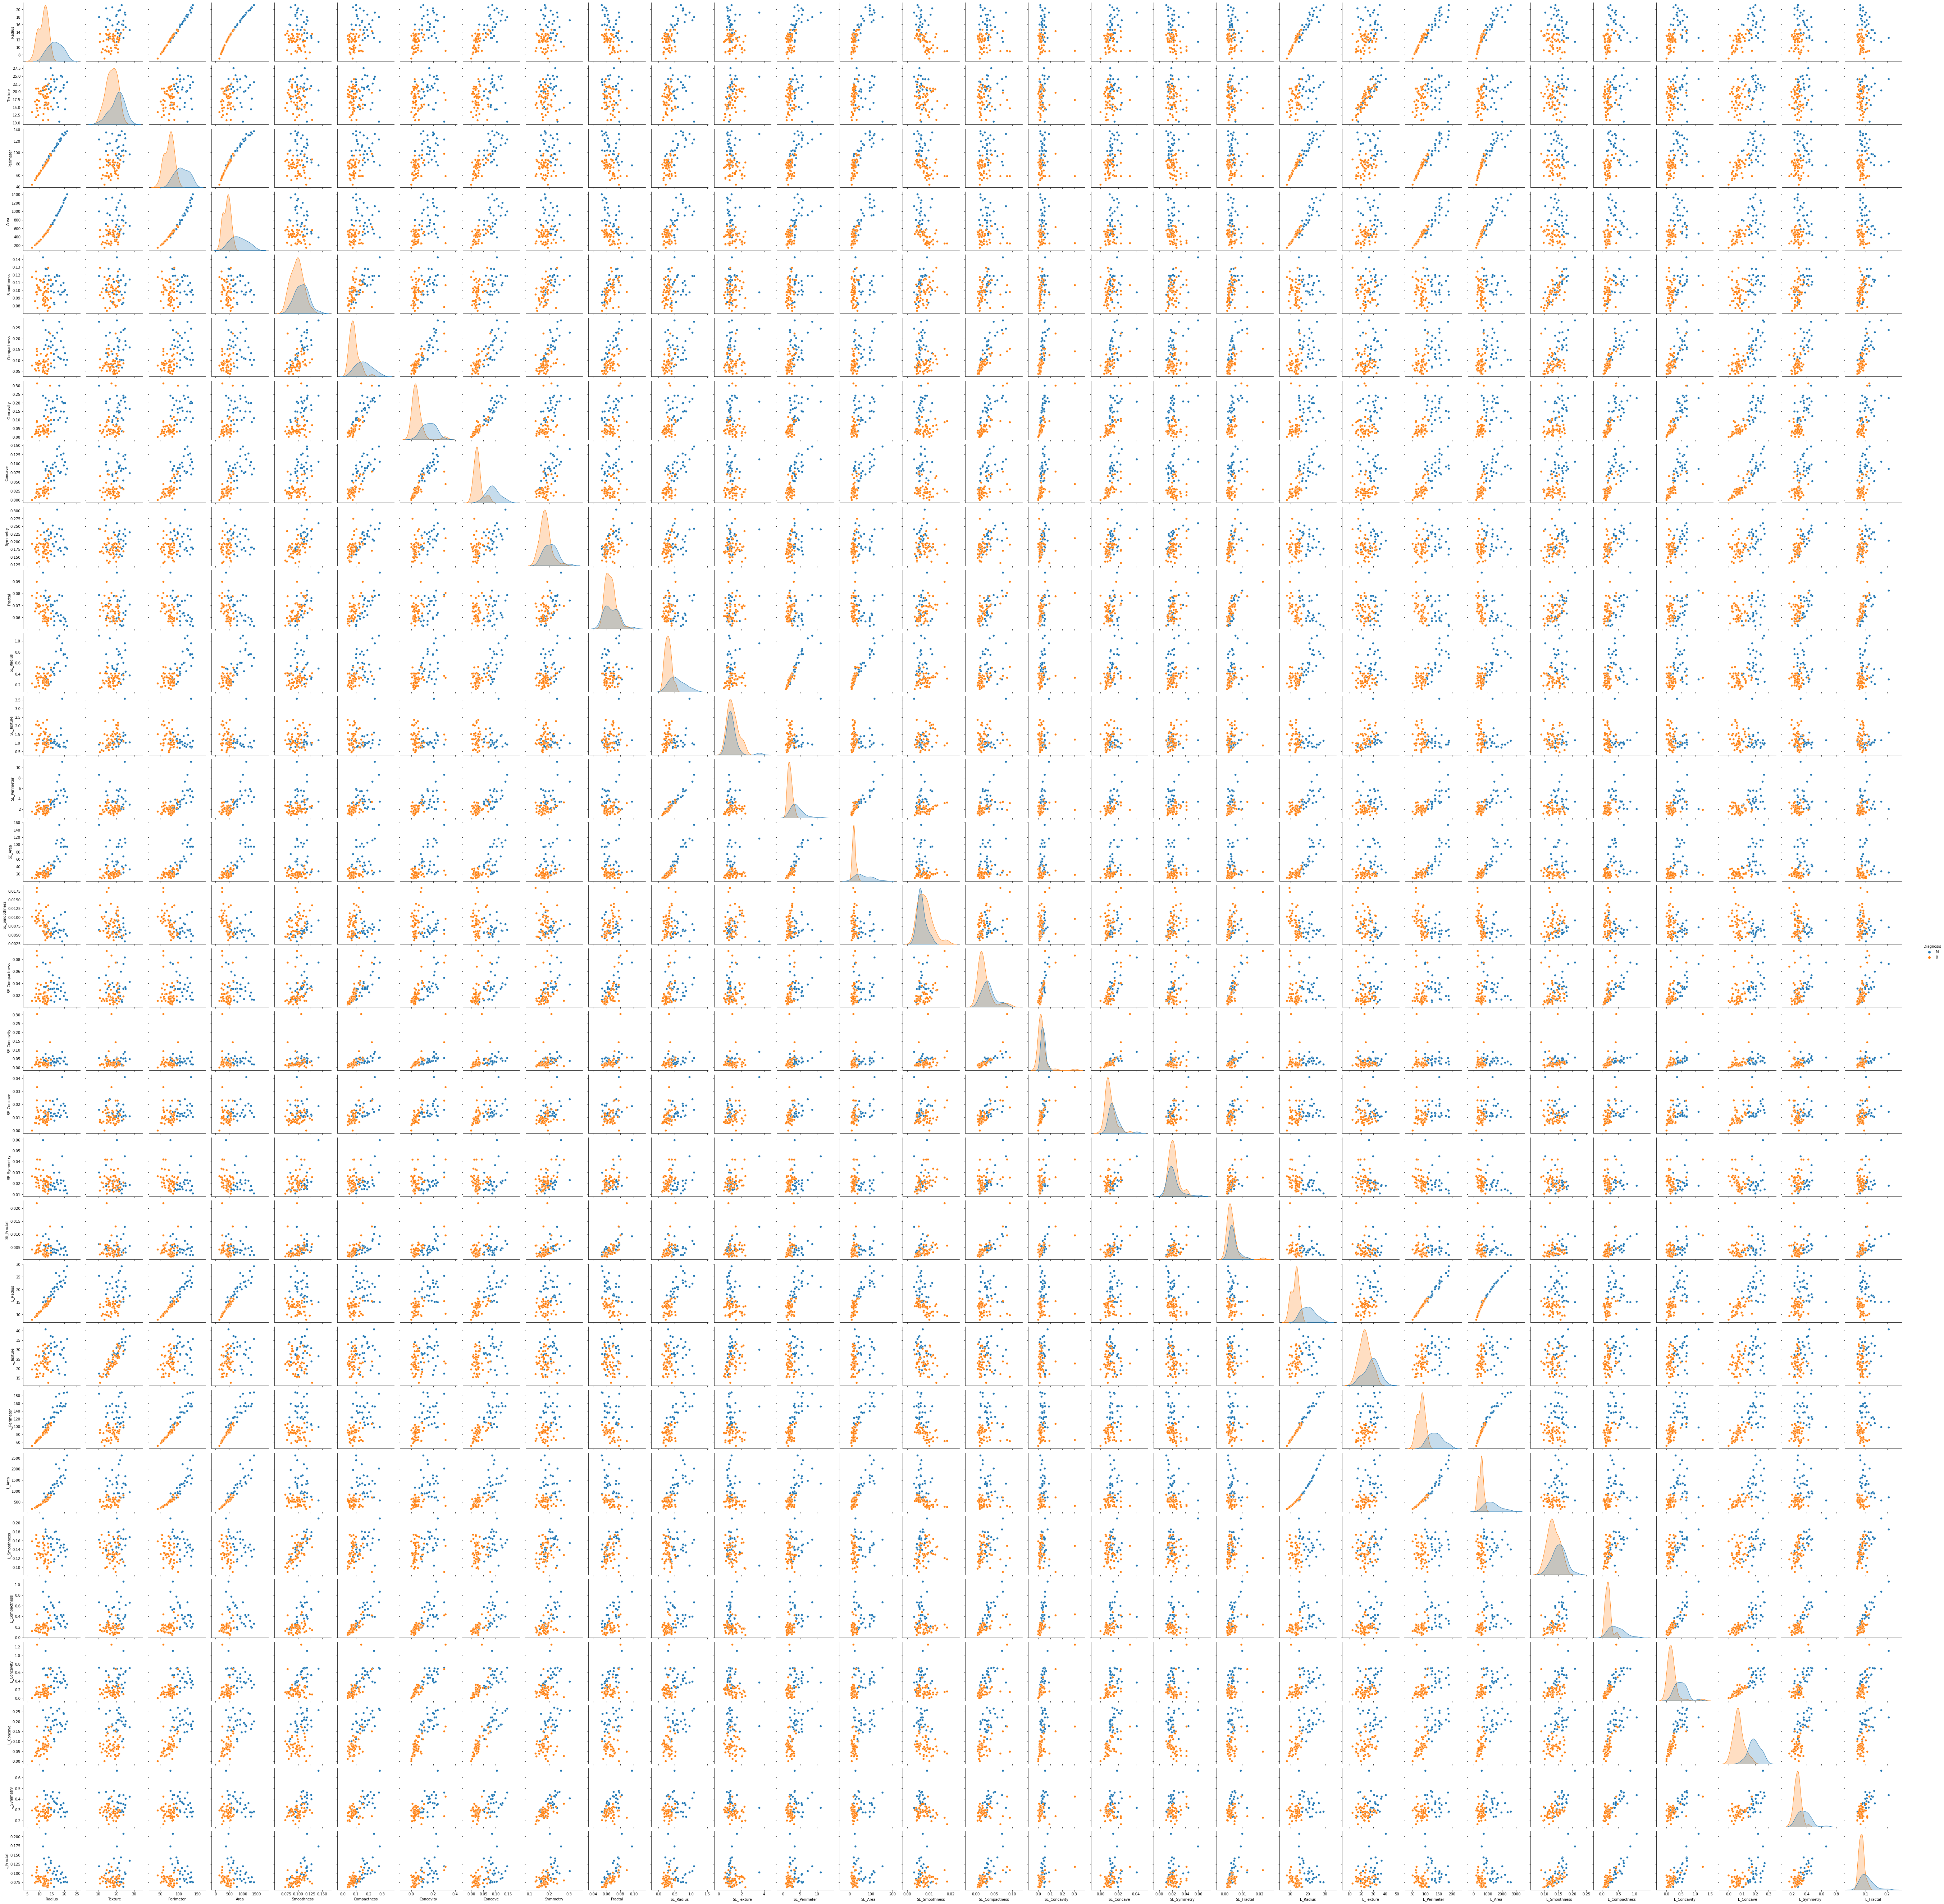

In [5]:
plot = pd.concat([pd.DataFrame(M.iloc[:30, 1:32]), pd.DataFrame(B.iloc[:50, 1:32])])
sns.pairplot(plot, hue='Diagnosis')
# pd.plotting.scatter_matrix(plot)

# Question (1c) (ii)

In [6]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='none').fit(X_train, y_train.to_numpy().ravel())

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

y_train_score = clf.score(X_train,  y_train)
y_test_score = clf.score(X_test,  y_test)

y_train_prob = clf.predict_proba(X_train)
y_test_prob = clf.predict_proba(X_test)

Breast Cancer Diagnosis Training Data
Confusion Matrix:
[[50  0]
 [ 0 30]]
            ROC:  <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x000002AB80373C40>
Precision Score:  1.0
   Recall Score:  1.0
       F1 Score:  1.0
            AUC:  1.0


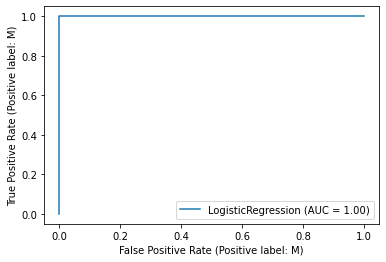

In [7]:
from sklearn.metrics import confusion_matrix, roc_curve, plot_roc_curve, precision_score, recall_score, f1_score, auc

print('Breast Cancer Diagnosis Training Data')
CM = confusion_matrix(y_train, y_train_pred)
print('Confusion Matrix:')
print(CM)
fpr, tpr, thresholds = roc_curve(y_train, y_train_prob[:, 1], pos_label="M")
print('            ROC: ', plot_roc_curve(clf, X_train, y_train))
print('Precision Score: ', precision_score(y_train, y_train_pred, pos_label='M'))
print('   Recall Score: ', recall_score(y_train, y_train_pred, pos_label="M"))
print('       F1 Score: ', f1_score(y_train, y_train_pred, pos_label="M"))
print('            AUC: ', auc(fpr, tpr))

Breast Cancer Diagnosis Test Data
Confusion Matrix:
[[272  35]
 [ 20 162]]
            ROC:  <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x000002ABD818AAF0>
Precision Score:  0.8223350253807107
   Recall Score:  0.8901098901098901
       F1 Score:  0.8548812664907651
            AUC:  0.8876937394852704


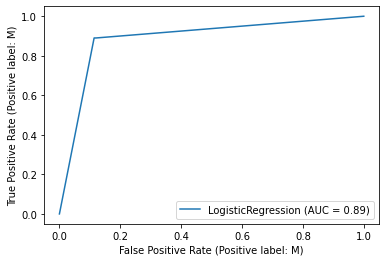

In [8]:
print('Breast Cancer Diagnosis Test Data')
CM = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(CM)
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob[:, 1], pos_label="M")
print('            ROC: ', plot_roc_curve(clf, X_test, y_test))
print('Precision Score: ', precision_score(y_test, y_test_pred, pos_label="M"))
print('   Recall Score: ', recall_score(y_test, y_test_pred, pos_label="M"))
print('       F1 Score: ', f1_score(y_test, y_test_pred, pos_label="M"))
print('            AUC: ', auc(fpr, tpr))

# Question (1c) (iii)

In [9]:
from sklearn.feature_selection import f_regression
import statsmodels.api as sm

freg = f_regression(X_train, y_train.replace({'M': 1, 'B': 0}).to_numpy().ravel())
p = freg[1].ravel()

print("p-values")
print(p.round(3))

# logit_model = sm.Logit(y_train.replace({'M': 1, 'B': 0}), X_train)
# result = logit_model.fit()
# print(result.summary())

# X2 = sm.add_constant(X_train)
# est = sm.OLS(y_train.replace({'M': 1, 'B': 0}), X2)
# est2 = est.fit()
# print(est2.summary())

p-values
[0.    0.    0.    0.    0.002 0.    0.    0.    0.    0.34  0.    0.509
 0.    0.    0.022 0.01  0.258 0.001 0.934 0.258 0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.   ]


In [10]:
# Insignificant features column # 9, 11, 16, 18, 19
# Delete rows where class = Fractal, SE_Texture, SE_Concavity, SE_Symmetry, SE_Fractal
X_train = X_train.drop(columns=['Fractal', 'SE_Texture', 'SE_Concavity', 'SE_Symmetry', 'SE_Fractal'])
X_test = X_test.drop(columns=['Fractal', 'SE_Texture', 'SE_Concavity', 'SE_Symmetry', 'SE_Fractal'])

In [11]:
clf = LogisticRegression(penalty='none').fit(X_train, y_train.to_numpy().ravel())

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

y_train_score = clf.score(X_train,  y_train)
y_test_score = clf.score(X_test,  y_test)

y_train_prob = clf.predict_proba(X_train)
y_test_prob = clf.predict_proba(X_test)

Breast Cancer Diagnosis Training Data
Confusion Matrix:
[[50  0]
 [ 0 30]]
            ROC:  <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x000002ABFC4A7250>
Precision Score:  1.0
   Recall Score:  1.0
       F1 Score:  1.0
            AUC:  1.0


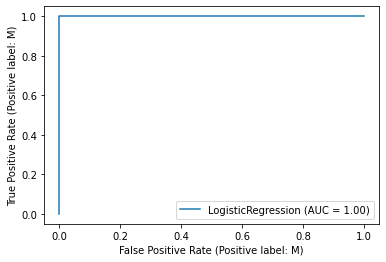

In [12]:
print('Breast Cancer Diagnosis Training Data')
CM = confusion_matrix(y_train, y_train_pred)
print('Confusion Matrix:')
print(CM)
fpr, tpr, thresholds = roc_curve(y_train, y_train_prob[:, 1], pos_label="M")
print('            ROC: ', plot_roc_curve(clf, X_train, y_train))
print('Precision Score: ', precision_score(y_train, y_train_pred, pos_label='M'))
print('   Recall Score: ', recall_score(y_train, y_train_pred, pos_label="M"))
print('       F1 Score: ', f1_score(y_train, y_train_pred, pos_label="M"))
print('            AUC: ', auc(fpr, tpr))

Breast Cancer Diagnosis Test Data
Confusion Matrix:
[[266  41]
 [ 19 163]]
            ROC:  <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x000002AB8045C850>
Precision Score:  0.7990196078431373
   Recall Score:  0.8956043956043956
       F1 Score:  0.844559585492228
            AUC:  0.8850091276801373


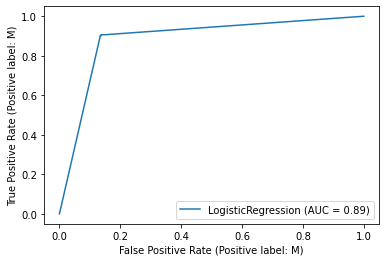

In [13]:
print('Breast Cancer Diagnosis Test Data')
CM = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(CM)
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob[:, 1], pos_label="M")
print('            ROC: ', plot_roc_curve(clf, X_test, y_test))
print('Precision Score: ', precision_score(y_test, y_test_pred, pos_label="M"))
print('   Recall Score: ', recall_score(y_test, y_test_pred, pos_label="M"))
print('       F1 Score: ', f1_score(y_test, y_test_pred, pos_label="M"))
print('            AUC: ', auc(fpr, tpr))

# Question (1c) (iv)

Yes, my linear classes seem to be well-seperated to cause instability in calculating logistic regression parameters. This is because when building my logistic regression model I recieved warning about the maximum amount of iterations preventing the model from being able to converge.

# Question (2a)

In [14]:
df = pd.read_csv('./wpbc.data', header=None)
df.drop(columns=[2], inplace=True)
df.head()

0  1      3      4       5       6        7       8       9        10  \
0  119513  N  18.02  27.60  117.50  1013.0  0.09489  0.1036  0.1086  0.07055   
1    8423  N  17.99  10.38  122.80  1001.0  0.11840  0.2776  0.3001  0.14710   
2  842517  N  21.37  17.44  137.50  1373.0  0.08836  0.1189  0.1255  0.08180   
3  843483  N  11.42  20.38   77.58   386.1  0.14250  0.2839  0.2414  0.10520   
4  843584  R  20.29  14.34  135.10  1297.0  0.10030  0.1328  0.1980  0.10430   

   ...      25      26      27      28      29      30      31       32   33  \
0  ...  139.70  1436.0  0.1195  0.1926  0.3140  0.1170  0.2677  0.08113  5.0   
1  ...  184.60  2019.0  0.1622  0.6656  0.7119  0.2654  0.4601  0.11890  3.0   
2  ...  159.10  1949.0  0.1188  0.3449  0.3414  0.2032  0.4334  0.09067  2.5   
3  ...   98.87   567.7  0.2098  0.8663  0.6869  0.2575  0.6638  0.17300  2.0   
4  ...  152.20  1575.0  0.1374  0.2050  0.4000  0.1625  0.2364  0.07678  3.5   

   34  
0   5  
1   2  
2   0  
3   0  
4   0  

[5 rows x 34 columns]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       198 non-null    int64  
 1   1       198 non-null    object 
 2   3       198 non-null    float64
 3   4       198 non-null    float64
 4   5       198 non-null    float64
 5   6       198 non-null    float64
 6   7       198 non-null    float64
 7   8       198 non-null    float64
 8   9       198 non-null    float64
 9   10      198 non-null    float64
 10  11      198 non-null    float64
 11  12      198 non-null    float64
 12  13      198 non-null    float64
 13  14      198 non-null    float64
 14  15      198 non-null    float64
 15  16      198 non-null    float64
 16  17      198 non-null    float64
 17  18      198 non-null    float64
 18  19      198 non-null    float64
 19  20      198 non-null    float64
 20  21      198 non-null    float64
 21  22      198 non-null    float64
 22  23

# Question (2b)

In [16]:
N = df[df[1] == 'N']
R = df[df[1] == 'R']
X_train = pd.concat([pd.DataFrame(N.iloc[:130, 2:]), pd.DataFrame(R.iloc[:37, 2:])]).append(pd.DataFrame(N.loc[[197], 2:]))
X_test  = pd.concat([pd.DataFrame(N.iloc[130:, 2:]), pd.DataFrame(R.iloc[37:, 2:])]).drop(index=[197])
y_train = pd.concat([pd.DataFrame(N.iloc[:130, 1]), pd.DataFrame(R.iloc[:37, 1])]).append(pd.DataFrame(N.loc[[197], 1]))
y_test  = pd.concat([pd.DataFrame(N.iloc[130:, 1]), pd.DataFrame(R.iloc[37:, 1])]).drop(index=[197])

# Question (2c)

In [17]:
# print(X_train[X_train[34] == '?'])
# print(X_test[X_test[34] == '?'])
# ? in index 6, 28, 85 of X_train and index 196 of X_test

lymph_nodes_median = df[df[34] != '?'][34].median()
X_train.loc[[6, 28, 85], [34]] = lymph_nodes_median
X_test.loc[[196], [34]] = lymph_nodes_median

# Question (2d) (i)

In [18]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train.to_numpy().ravel())

y_train_pred = gnb.predict(X_train)
y_test_pred = gnb.predict(X_test)

y_train_score = gnb.score(X_train,  y_train)
y_test_score = gnb.score(X_test,  y_test)

y_train_prob = gnb.predict_proba(X_train)
y_test_prob = gnb.predict_proba(X_test)

Breast Cancer Diagnosis Training Data
Confusion Matrix:
[[99 32]
 [19 18]]
            ROC:  <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x000002AB820A8370>
Precision Score:  0.36
   Recall Score:  0.4864864864864865
       F1 Score:  0.4137931034482759
            AUC:  0.6707241592737776


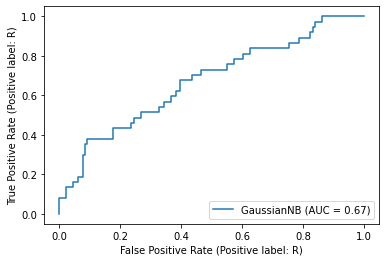

In [19]:
print('Breast Cancer Diagnosis Training Data')
CM = confusion_matrix(y_train, y_train_pred)
print('Confusion Matrix:')
print(CM)
fpr, tpr, thresholds = roc_curve(y_train, y_train_prob[:, 1], pos_label="R")
print('            ROC: ', plot_roc_curve(gnb, X_train, y_train))
print('Precision Score: ', precision_score(y_train, y_train_pred, pos_label='R'))
print('   Recall Score: ', recall_score(y_train, y_train_pred, pos_label="R"))
print('       F1 Score: ', f1_score(y_train, y_train_pred, pos_label="R"))
print('            AUC: ', auc(fpr, tpr))

Breast Cancer Diagnosis Test Data
Confusion Matrix:
[[13  7]
 [ 6  4]]
            ROC:  <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x000002AB8044B3A0>
Precision Score:  0.6842105263157895
   Recall Score:  0.65
       F1 Score:  0.6666666666666667
            AUC:  0.585


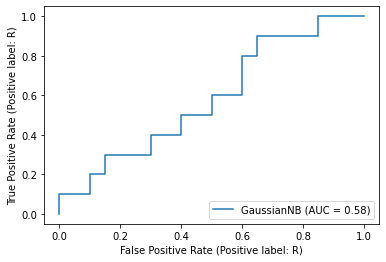

In [20]:
print('Breast Cancer Diagnosis Test Data')
CM = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(CM)
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob[:, 1], pos_label="R")
print('            ROC: ', plot_roc_curve(gnb, X_test, y_test))
print('Precision Score: ', precision_score(y_test, y_test_pred, pos_label='N'))
print('   Recall Score: ', recall_score(y_test, y_test_pred, pos_label="N"))
print('       F1 Score: ', f1_score(y_test, y_test_pred, pos_label="N"))
print('            AUC: ', auc(fpr, tpr))

# Question (2d) (ii)

In [21]:
from imblearn.over_sampling import SMOTE
df.loc[[6, 28, 85, 196], [34]] = lymph_nodes_median
df = df.sample(frac=1)

N = df[df[1] == 'N']
R = df[df[1] == 'R']

# Choose 89 random (reshuffled) instances and add instance #197
X_train = pd.concat([pd.DataFrame(N.iloc[:89, 2:]), pd.DataFrame(R.iloc[:37, 2:])]).append(pd.DataFrame(N.loc[[197], 2:]))
y_train = pd.concat([pd.DataFrame(N.iloc[:89, 1]), pd.DataFrame(R.iloc[:37, 1])]).append(pd.DataFrame(N.loc[[197], 1]))

smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

In [22]:
gnb = GaussianNB().fit(X_train, y_train.to_numpy().ravel())

y_train_pred = gnb.predict(X_train)
y_test_pred = gnb.predict(X_test)

y_train_score = gnb.score(X_train,  y_train)
y_test_score = gnb.score(X_test,  y_test)

y_train_prob = gnb.predict_proba(X_train)
y_test_prob = gnb.predict_proba(X_test)

Breast Cancer Diagnosis Training Data
Confusion Matrix:
[[62 28]
 [18 72]]
            ROC:  <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x000002ABEE52F940>
Precision Score:  0.72
   Recall Score:  0.8
       F1 Score:  0.7578947368421052
            AUC:  0.7874074074074073


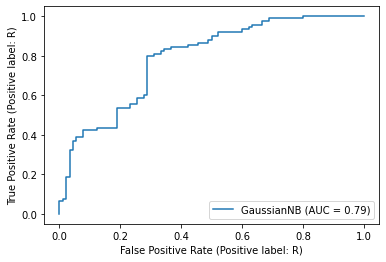

In [23]:
print('Breast Cancer Diagnosis Training Data')
CM = confusion_matrix(y_train, y_train_pred)
print('Confusion Matrix:')
print(CM)
fpr, tpr, thresholds = roc_curve(y_train, y_train_prob[:, 1], pos_label="R")
print('            ROC: ', plot_roc_curve(gnb, X_train, y_train))
print('Precision Score: ', precision_score(y_train, y_train_pred, pos_label='R'))
print('   Recall Score: ', recall_score(y_train, y_train_pred, pos_label="R"))
print('       F1 Score: ', f1_score(y_train, y_train_pred, pos_label="R"))
print('            AUC: ', auc(fpr, tpr))

Breast Cancer Diagnosis Test Data
Confusion Matrix:
[[14  6]
 [ 3  7]]
            ROC:  <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x000002AB82214D30>
Precision Score:  0.8235294117647058
   Recall Score:  0.7
       F1 Score:  0.7567567567567567
            AUC:  0.76


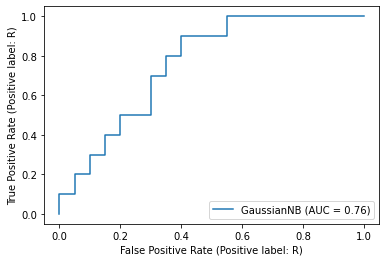

In [24]:
print('Breast Cancer Diagnosis Test Data')
CM = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(CM)
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob[:, 1], pos_label="R")
print('            ROC: ', plot_roc_curve(gnb, X_test, y_test))
print('Precision Score: ', precision_score(y_test, y_test_pred, pos_label='N'))
print('   Recall Score: ', recall_score(y_test, y_test_pred, pos_label="N"))
print('       F1 Score: ', f1_score(y_test, y_test_pred, pos_label="N"))
print('            AUC: ', auc(fpr, tpr))

Yes, SMOTE does help us classify the data because the original data set is rather imbalanced.